In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv', low_memory=False)

In [3]:
X, y = df.loc[:, [column for column in df.columns if column != "loan_status"]], df.loan_status
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1, random_state=6, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_1, y_1, test_size=0.1, random_state=6, stratify=y_1)
EDA = pd.concat((X_train, y_train), axis=1)

In [4]:
print('Train_X:', X_train.shape, '\nTrain_y:', y_train.shape)
print('-'*50)
print('Valid_X:', X_val.shape, '\nValid_y:', y_val.shape)

Train_X: (176952, 150) 
Train_y: (176952,)
--------------------------------------------------
Valid_X: (19662, 150) 
Valid_y: (19662,)


In [5]:
EDA.shape #Train_X + Train_y

(176952, 151)

In [6]:
EDA.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 176952 entries, 17156 to 137746
Data columns (total 151 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    id                                          176952 non-null  int64  
 1    member_id                                   0 non-null       float64
 2    loan_amnt                                   176952 non-null  float64
 3    funded_amnt                                 176952 non-null  float64
 4    funded_amnt_inv                             176952 non-null  float64
 5    term                                        176952 non-null  object 
 6    int_rate                                    176952 non-null  float64
 7    installment                                 176952 non-null  float64
 8    grade                                       176952 non-null  object 
 9    sub_grade                                   176952 non-nul

## EDA 그룹화
- 비슷한 의미와 타입에 따라 그룹화; 같은 의미끼리의 컬럼내 비교 및 다른 의미와 상관관계 보기 위해 150개의 특성 그룹화

In [7]:
#EDA 그룹
target = 'loan_status'
#명목형
##1
info =['initial_list_status','settlement_status','debt_settlement_flag',
      'hardship_flag','hardship_status','hardship_reason','hardship_loan_status',
      'term','application_type','purpose','pymnt_plan','disbursement_method']

##2 month / year로 파생
date = ['issue_d','earliest_cr_line','sec_app_earliest_cr_line','last_pymnt_d','next_pymnt_d','settlement_date','debt_settlement_flag_date',
        'payment_plan_start_date','hardship_start_date','hardship_end_date', 'last_credit_pull_d']
##3
mths = ['mo_sin_old_rev_tl_op','mo_sin_old_il_acct','mo_sin_rcnt_rev_tl_op','mths_since_recent_bc', 'mo_sin_rcnt_tl','mths_since_rcnt_il',
        'mths_since_recent_inq','inq_last_12m','inq_last_6mths', 'inq_fi']

##4 too Many Unique Values
MUV = ['emp_title', 'title']

#수치형
##1
credit_balance = ['all_util','bc_open_to_buy','max_bal_bc',
                  'loan_amnt','funded_amnt','funded_amnt_inv','tot_hi_cred_lim','total_bc_limit',
                  'total_pymnt_inv','total_pymnt','total_rec_prncp','total_rec_int',
                  'last_pymnt_amnt','hardship_last_payment_amount', #지난 납부 잔액
'out_prncp', 'out_prncp_inv','hardship_payoff_balance_amount','total_bal_ex_mort','total_bal_il','revol_bal','revol_bal_joint']  #갚을잔액 
##2
loan  = ['installment','int_rate','settlement_amount','hardship_amount','orig_projected_additional_accrued_interest']
##3
fee = ['collection_recovery_fee','delinq_amnt','total_rec_late_fee','tot_coll_amt','recoveries']
##4
score = ['fico_range_high', 'fico_range_low', 'last_fico_range_high', 'last_fico_range_low','grade','sub_grade',
         'tot_hi_cred_lim','total_il_high_credit_limit','total_rev_hi_lim','total_bc_limit','mths_since_last_major_derog']
##5
sub_credit_score =['sec_app_inq_last_6mths','sec_app_chargeoff_within_12_mths',
             'sec_app_mths_since_last_major_derog','sec_app_collections_12_mths_ex_med',
             'sec_app_fico_range_low','sec_app_fico_range_high','verified_status_joint','annual_inc_joint']

##7
accts = ['open_acc_6m','acc_open_past_24mths','open_rv_24m','open_il_24m','num_tl_op_past_12m','open_rv_12m','open_il_12m',
         'total_acc','total_cu_tl','num_rev_accts','num_il_tl','mort_acc',
         'num_sats','pct_tl_nvr_dlq',
         'open_acc','open_act_il','num_op_rev_tl','num_rev_tl_bal_gt_0',
         'acc_now_delinq','num_tl_30dpd','num_tl_120dpd_2m','num_accts_ever_120_pd']
##8
sub_accts = ['sec_app_open_acc','sec_app_mort_acc','sec_app_open_act_il']
##9
cards = ['num_bc_tl','num_bc_sats','num_actv_bc_tl','num_actv_rev_tl']
##10
rate = ['revol_util','percent_bc_gt_75','bc_util', 'il_util','sec_app_revol_util','settlement_percentage','dti','dti_joint']

#신용위험
##11
risk_count = ['pub_rec_bankruptcies','pub_rec','tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med',
              'delinq_2yrs','hardship_dpd','settlement_term']
##12
risk_mnts = ['mths_since_last_delinq','mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq']


#혼합 
##13
property = ['verification_status','annual_inc','tot_cur_bal','avg_cur_bal',
            'home_ownership','emp_length','zip_code','addr_state']


## 명목형 컬럼 EDA

In [8]:
#명목형 컬럼 EDA를 위한 함수 설계

#명목형 unique 값의 갯수를 세고, n개 미만이면 unique 값을 출력하는 함수
def print_uv(group,n):
    for col in group:
        nu = EDA[col].nunique()
        print(f'{col} NU: {nu}')
        if nu < n :
            print(EDA[col].unique(), '\n')
        else:
            print('!!!TOO MANY!!!\n', EDA[col].unique()[1:5])

        print('-'*70)


#긴 명목형 값을 그래프에 45도로 출력하는 함수
def set_xticklabels(ax):
    for a in ax:
        ticks = range(len(a.get_xticks()))
        a.set_xticks(ticks)
        a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right')

#### 1. info 그룹 EDA 
- 대출자의 상태 정보(카테고리형)

In [9]:
print_uv(MUV, 15)

emp_title NU: 59790
!!!TOO MANY!!!
 ['budget execution branch head' 'Contracts Administration'
 'owner operator ' 'Supervisor']
----------------------------------------------------------------------
title NU: 14
['Credit card refinancing' 'Debt consolidation' 'Home improvement' 'Other'
 'Business' 'Moving and relocation' 'Vacation' 'Major purchase'
 'Car financing' 'Green loan' 'Medical expenses' 'Home buying' nan
 'odymeds' 'SAVE'] 

----------------------------------------------------------------------


In [10]:
EDA[['funded_amnt_inv']][EDA['funded_amnt_inv']==0]

,funded_amnt_inv


In [11]:
EDA[['funded_amnt']][EDA['funded_amnt_inv']==0]

,funded_amnt


In [12]:
print_uv(info, 15)

initial_list_status NU: 2
['w' 'f'] 

----------------------------------------------------------------------
settlement_status NU: 3
[nan 'COMPLETE' 'ACTIVE' 'BROKEN'] 

----------------------------------------------------------------------
debt_settlement_flag NU: 2
['N' 'Y'] 

----------------------------------------------------------------------
hardship_flag NU: 1
['N'] 

----------------------------------------------------------------------
hardship_status NU: 2
[nan 'COMPLETED' 'BROKEN'] 

----------------------------------------------------------------------
hardship_reason NU: 9
[nan 'MEDICAL' 'REDUCED_HOURS' 'EXCESSIVE_OBLIGATIONS' 'NATURAL_DISASTER'
 'UNEMPLOYMENT' 'INCOME_CURTAILMENT' 'DISABILITY' 'DIVORCE' 'FAMILY_DEATH'] 

----------------------------------------------------------------------
hardship_loan_status NU: 4
[nan 'In Grace Period' 'Late (16-30 days)' 'Current' 'Late (31-120 days)'] 

----------------------------------------------------------------------
term NU:

In [13]:
EDA[info].info()

<class 'pandas.core.frame.DataFrame'>
Index: 176952 entries, 17156 to 137746
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   initial_list_status   176952 non-null  object
 1   settlement_status     5672 non-null    object
 2   debt_settlement_flag  176952 non-null  object
 3   hardship_flag         176952 non-null  object
 4   hardship_status       985 non-null     object
 5   hardship_reason       985 non-null     object
 6   hardship_loan_status  985 non-null     object
 7   term                  176952 non-null  object
 8   application_type      176952 non-null  object
 9   purpose               176952 non-null  object
 10  pymnt_plan            176952 non-null  object
 11  disbursement_method   176952 non-null  object
dtypes: object(12)
memory usage: 17.6+ MB


In [14]:
len(info)

12

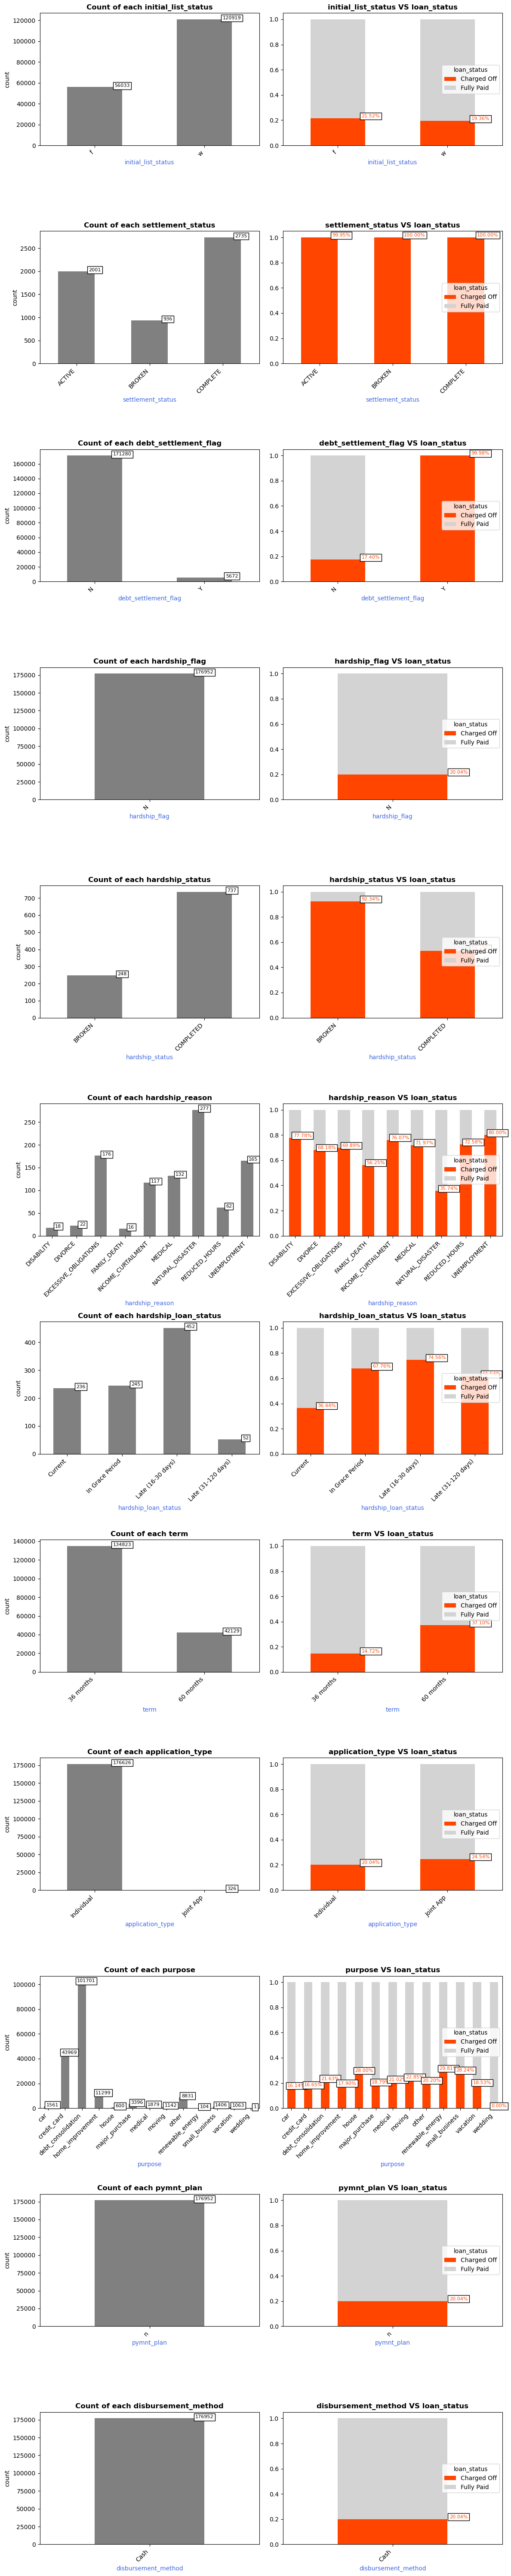

In [15]:
fig, ax = plt.subplots(len(info), 2, figsize=(12, 5*len(info)))
for idx, col in enumerate(info):
    ax1 = sns.countplot(data=EDA[info + [target]], x=col, order=np.sort(EDA[col].dropna().unique()), 
                        width=0.5, ax=ax[idx, 0], color='gray')
    ax1.set_title(f"Count of each {col}",size=12, weight="bold")
    font1 = {'color':'royalblue','size':10, 'rotation':360}
    ax1.set_xlabel(col, fontdict=font1)

    # 타겟에 대한 컬럼의 범주별 비율 계산
    prop_df = pd.crosstab(EDA[col], EDA[target], normalize='index')
    ax2 = prop_df.plot(kind='bar', stacked=True, ax=ax[idx, 1], color=['orangered','lightgray'])
    ax2.set_title(f"{col} VS {target}", size=12, weight="bold")
    font2 = { 'color':'royalblue','size':10, 'rotation':360}
    ax2.set_xlabel(col,fontdict=font2)
    ax2.legend(title=target, loc='center right')

    
    for bar1, bar2 in zip(ax1.patches, ax2.patches):
        bbox_props = dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor="white")  # 네모 박스 스타일 정의
        ax1.text(bar1.get_x() + bar1.get_width(), bar1.get_height(), int(bar1.get_height()), 
                 ha="center", size=8,bbox=bbox_props)
        ax2.text(bar2.get_x() + bar2.get_width()+0.05 , bar2.get_height(), f'{bar2.get_height():.2%}',
                 ha='center', va='bottom', size=8, color='orangered',bbox=bbox_props)
        


# 눈금 레이블 회전 설정
set_xticklabels(ax[:, 0])
set_xticklabels(ax[:, 1])

# xticks 크기 조정
plt.xticks(fontsize=10)


plt.tight_layout()
plt.show()

#### 2. date 그룹 EDA 
- 대출과 관련된 날짜

In [16]:
EDA[date].info()

<class 'pandas.core.frame.DataFrame'>
Index: 176952 entries, 17156 to 137746
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   issue_d                    176952 non-null  object 
 1   earliest_cr_line           176952 non-null  object 
 2   sec_app_earliest_cr_line   0 non-null       float64
 3   last_pymnt_d               176788 non-null  object 
 4   next_pymnt_d               0 non-null       float64
 5   settlement_date            5672 non-null    object 
 6   debt_settlement_flag_date  5672 non-null    object 
 7   payment_plan_start_date    985 non-null     object 
 8   hardship_start_date        985 non-null     object 
 9   hardship_end_date          985 non-null     object 
 10  last_credit_pull_d         176949 non-null  object 
dtypes: float64(2), object(9)
memory usage: 16.2+ MB


In [17]:
print_uv(date, 30)

issue_d NU: 7
['Dec-2015' 'Jul-2015' 'Nov-2015' 'Oct-2015' 'Aug-2015' 'Sep-2015'
 'Jun-2015'] 

----------------------------------------------------------------------
earliest_cr_line NU: 646
!!!TOO MANY!!!
 ['Oct-1993' 'Mar-2003' 'Oct-1991' 'Apr-2004']
----------------------------------------------------------------------
sec_app_earliest_cr_line NU: 0
[nan] 

----------------------------------------------------------------------
last_pymnt_d NU: 46
!!!TOO MANY!!!
 ['Dec-2016' 'Apr-2017' 'Jan-2017' 'Oct-2018']
----------------------------------------------------------------------
next_pymnt_d NU: 0
[nan] 

----------------------------------------------------------------------
settlement_date NU: 39
!!!TOO MANY!!!
 ['Dec-2017' 'Nov-2017' 'Feb-2017' 'Apr-2018']
----------------------------------------------------------------------
debt_settlement_flag_date NU: 37
!!!TOO MANY!!!
 ['Jan-2018' 'Dec-2018' 'Sep-2017' 'Apr-2018']
---------------------------------------------------------------

In [18]:
#전부 NA인 컬럼 제거
date.remove('next_pymnt_d')

In [19]:
# 날짜 속성 이용하기 위해 날짜 데이터로 변경
for col in date:
    EDA[col] = pd.to_datetime(EDA[col], format='%b-%Y')
    EDA[f'{col}_Y'] = EDA[col].dt.year
    EDA[f'{col}_M'] = EDA[col].dt.month

month = [col for col in EDA.columns.tolist() if 'M' in col]
year = [col for col in EDA.columns.tolist() if 'Y' in col]

In [20]:
EDA.issue_d

17156    2015-12-01
199327   2015-07-01
37536    2015-11-01
184601   2015-07-01
111425   2015-10-01
            ...    
72722    2015-10-01
206190   2015-07-01
169197   2015-07-01
157659   2015-08-01
137746   2015-09-01
Name: issue_d, Length: 176952, dtype: datetime64[ns]

In [21]:
EDA[['issue_d','loan_status']].groupby('issue_d').value_counts()

issue_d     loan_status
2015-06-01  Fully Paid      3822
            Charged Off      944
2015-07-01  Fully Paid     26392
            Charged Off     6652
2015-08-01  Fully Paid     20579
            Charged Off     5143
2015-09-01  Fully Paid     16179
            Charged Off     4178
2015-10-01  Fully Paid     28216
            Charged Off     6605
2015-11-01  Fully Paid     21378
            Charged Off     5349
2015-12-01  Fully Paid     24918
            Charged Off     6597
Name: count, dtype: int64

In [22]:
EDA[['issue_d','loan_status']]

,issue_d,loan_status
17156,2015-12-01,Fully Paid
199327,2015-07-01,Fully Paid
37536,2015-11-01,Fully Paid
184601,2015-07-01,Fully Paid
111425,2015-10-01,Fully Paid
...,...,...
72722,2015-10-01,Fully Paid
206190,2015-07-01,Fully Paid
169197,2015-07-01,Fully Paid
157659,2015-08-01,Fully Paid


In [23]:
EDA[month]

,issue_d_M,earliest_cr_line_M,sec_app_earliest_cr_line_M,last_pymnt_d_M,settlement_date_M,debt_settlement_flag_date_M,payment_plan_start_date_M,hardship_start_date_M,hardship_end_date_M,last_credit_pull_d_M
17156,12,9,NaN,12.0,NaN,NaN,NaN,NaN,NaN,3.0
199327,7,9,NaN,12.0,NaN,NaN,NaN,NaN,NaN,2.0
37536,11,10,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0
184601,7,3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8.0
111425,10,10,NaN,10.0,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...
72722,10,1,NaN,10.0,NaN,NaN,NaN,NaN,NaN,10.0
206190,7,1,NaN,12.0,NaN,NaN,NaN,NaN,NaN,3.0
169197,7,4,NaN,7.0,NaN,NaN,NaN,NaN,NaN,3.0
157659,8,9,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0


In [24]:
EDA[['issue_d','loan_status']].groupby('issue_d').value_counts()

issue_d     loan_status
2015-06-01  Fully Paid      3822
            Charged Off      944
2015-07-01  Fully Paid     26392
            Charged Off     6652
2015-08-01  Fully Paid     20579
            Charged Off     5143
2015-09-01  Fully Paid     16179
            Charged Off     4178
2015-10-01  Fully Paid     28216
            Charged Off     6605
2015-11-01  Fully Paid     21378
            Charged Off     5349
2015-12-01  Fully Paid     24918
            Charged Off     6597
Name: count, dtype: int64

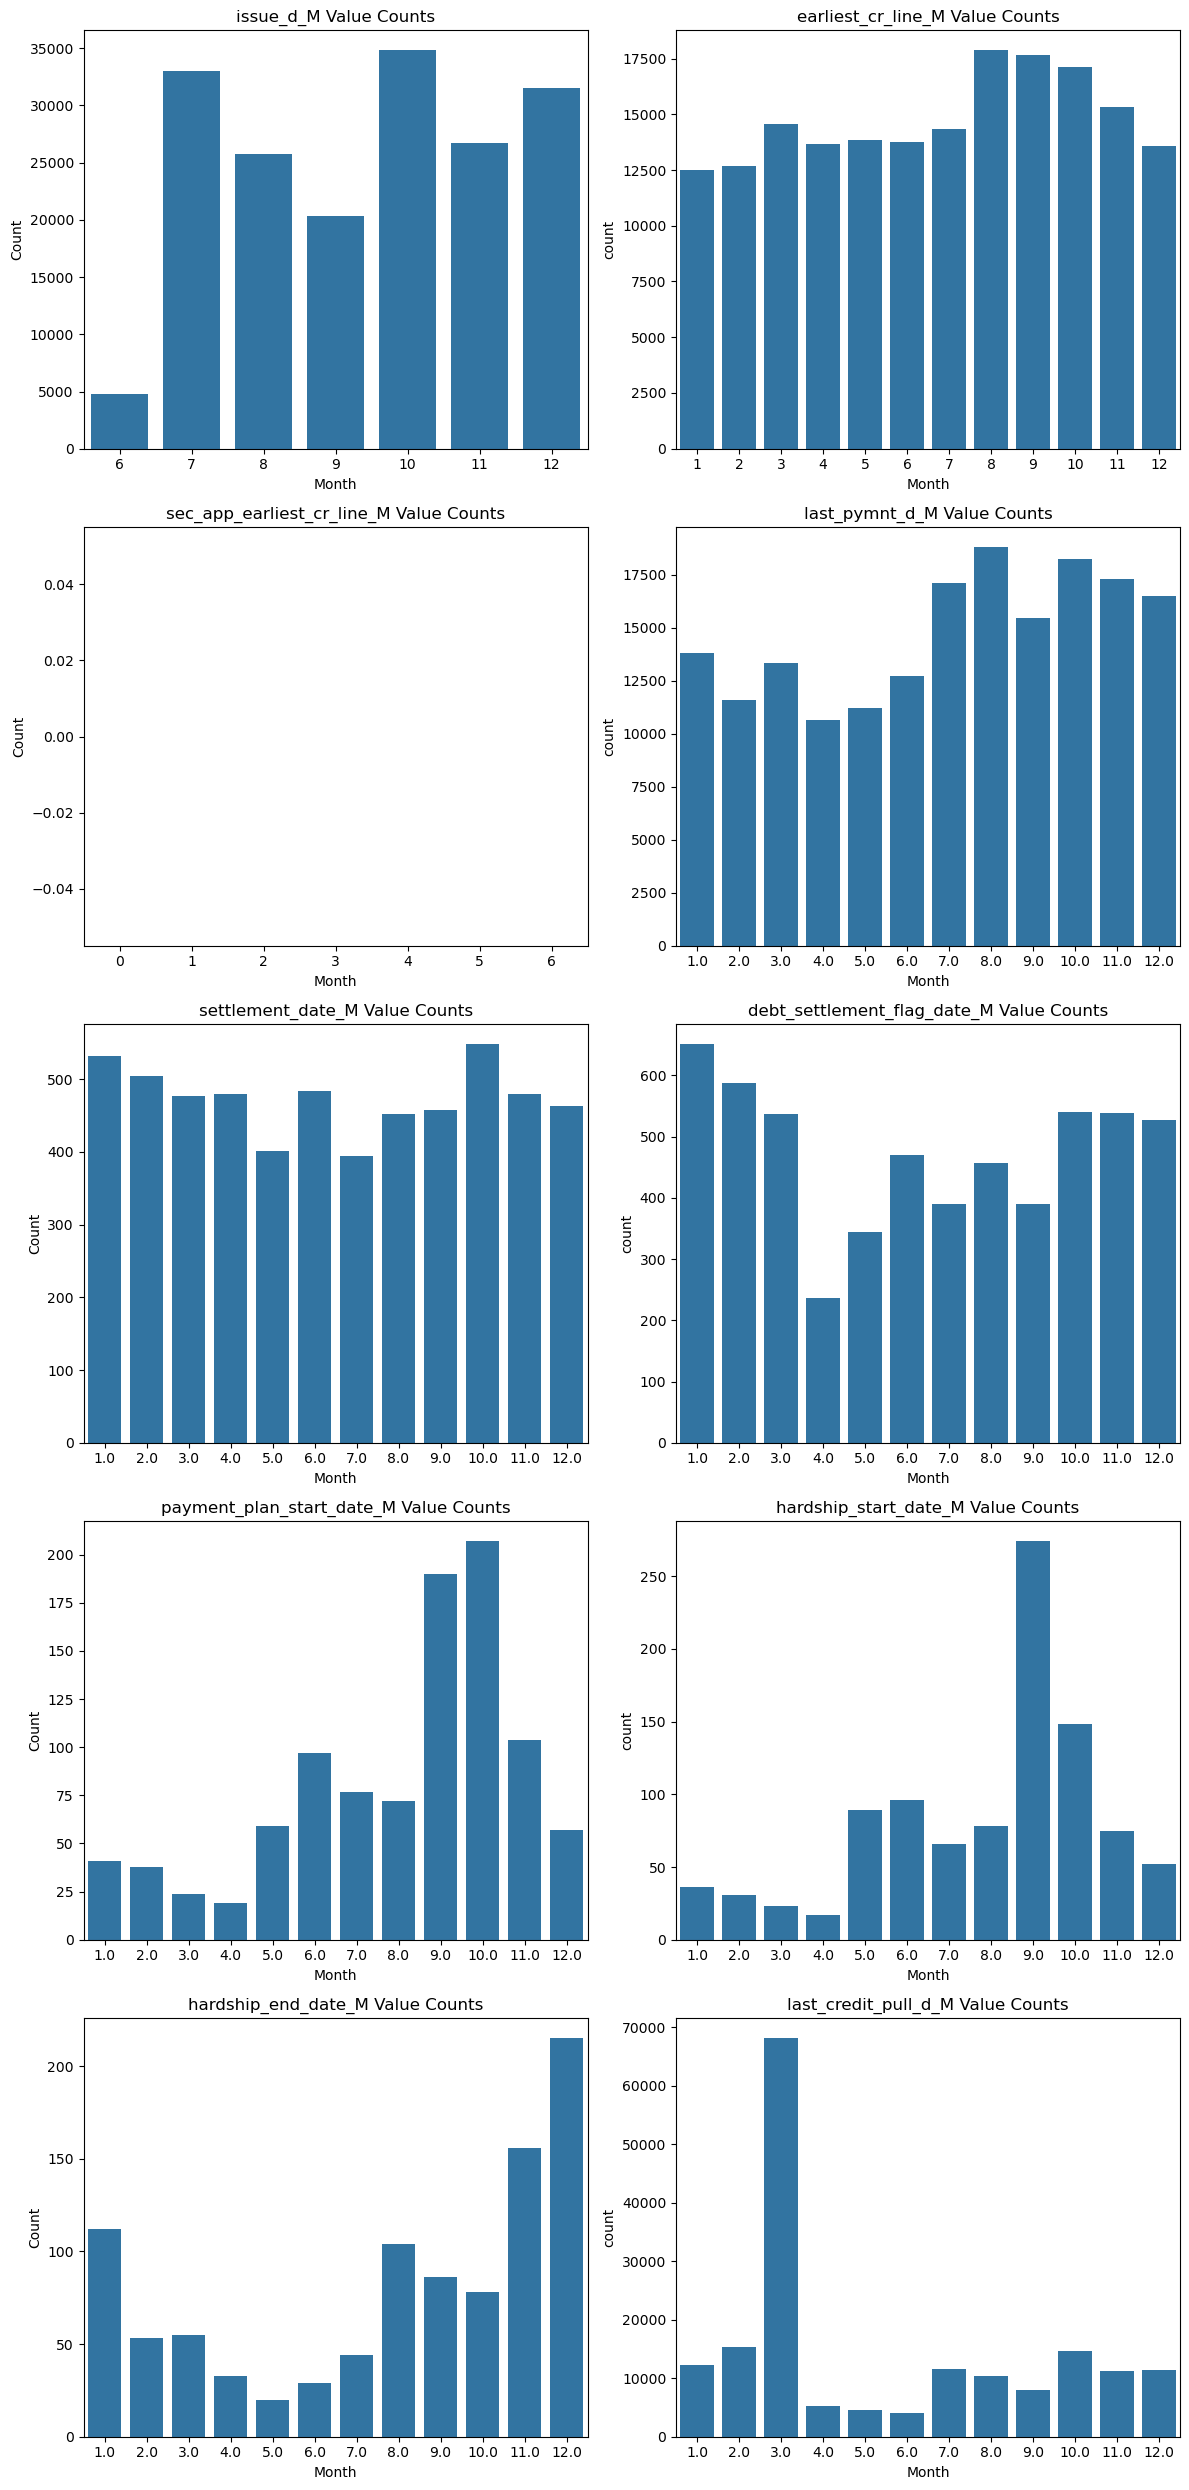

In [25]:
fig, ax = plt.subplots(round(len(month)/2), 2, figsize=(12, 5*(len(month))/2))

for idx, col in enumerate(month):
    if idx % 2 == 0 : 
        sns.countplot(x=col,  data=EDA,   ax=ax[idx//2, 0])
        ax[idx//2, 0].set_title(f'{col} Value Counts')
        ax[idx//2, 0].set_xlabel('Month')
        ax[idx//2, 0].set_ylabel('Count')
        
    else :
        sns.countplot(x=col,  data=EDA,  ax=ax[idx//2, 1])
        ax[idx//2, 1].set_title(f'{col} Value Counts')
        ax[idx//2, 1].set_xlabel('Month')
        ax[idx//2, 0].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [26]:
year

['issue_d_Y',
 'earliest_cr_line_Y',
 'sec_app_earliest_cr_line_Y',
 'last_pymnt_d_Y',
 'settlement_date_Y',
 'debt_settlement_flag_date_Y',
 'payment_plan_start_date_Y',
 'hardship_start_date_Y',
 'hardship_end_date_Y',
 'last_credit_pull_d_Y']

In [27]:
np.sort(EDA['earliest_cr_line_Y'].unique()) #67개

array([1950, 1951, 1952, 1953, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012])

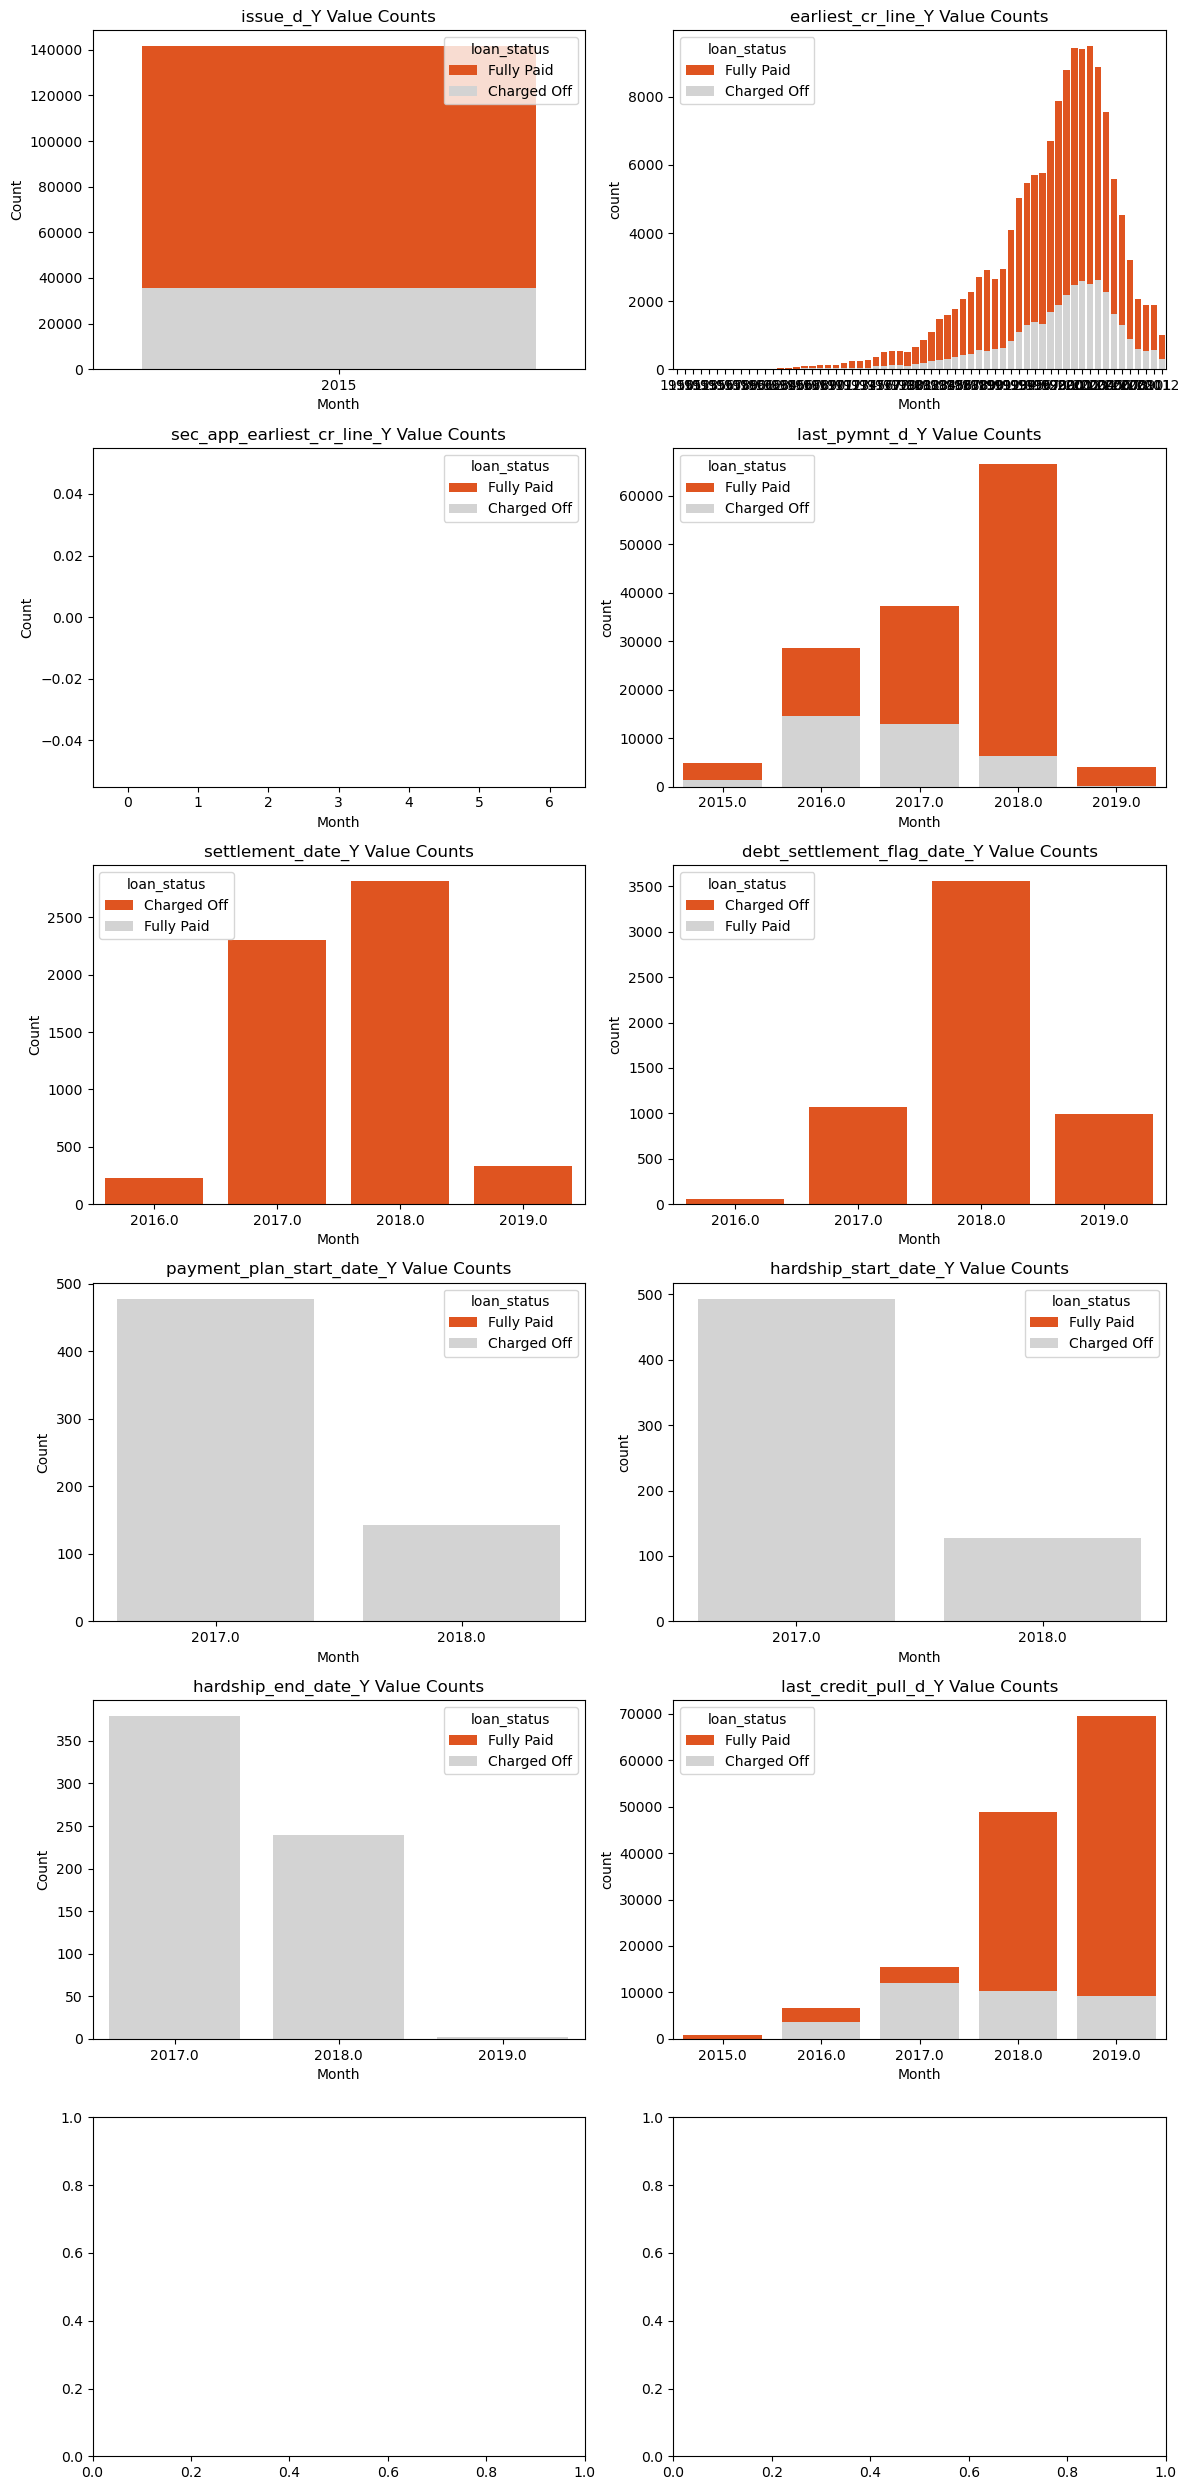

In [28]:
fig, ax = plt.subplots(round(len(year)/2)+1, 2, figsize=(12, 5*(len(year))/2))

for idx, col in enumerate(year):
    if idx % 2 == 0 : 
        sns.countplot(x=col, hue=target, data=EDA, palette=['orangered', 'lightgray'], dodge=False, ax=ax[idx//2, 0])
        ax[idx//2, 0].set_title(f'{col} Value Counts')
        ax[idx//2, 0].set_xlabel('Month')
        ax[idx//2, 0].set_ylabel('Count')
        
    else :
        sns.countplot(x=col, hue=target, data=EDA, palette=['orangered', 'lightgray'], dodge=False, ax=ax[idx//2, 1])
        ax[idx//2, 1].set_title(f'{col} Value Counts')
        ax[idx//2, 1].set_xlabel('Month')
        ax[idx//2, 0].set_ylabel('Count')



plt.tight_layout()
plt.show()

### 3. mths 그룹

In [29]:
mths

['mo_sin_old_rev_tl_op',
 'mo_sin_old_il_acct',
 'mo_sin_rcnt_rev_tl_op',
 'mths_since_recent_bc',
 'mo_sin_rcnt_tl',
 'mths_since_rcnt_il',
 'mths_since_recent_inq',
 'inq_last_12m',
 'inq_last_6mths',
 'inq_fi']

In [30]:
EDA[mths].info()

<class 'pandas.core.frame.DataFrame'>
Index: 176952 entries, 17156 to 137746
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mo_sin_old_rev_tl_op   176952 non-null  float64
 1   mo_sin_old_il_acct     171699 non-null  float64
 2   mo_sin_rcnt_rev_tl_op  176952 non-null  float64
 3   mths_since_recent_bc   175310 non-null  float64
 4   mo_sin_rcnt_tl         176952 non-null  float64
 5   mths_since_rcnt_il     14913 non-null   float64
 6   mths_since_recent_inq  158369 non-null  float64
 7   inq_last_12m           15342 non-null   float64
 8   inq_last_6mths         176952 non-null  float64
 9   inq_fi                 15342 non-null   float64
dtypes: float64(10)
memory usage: 14.9 MB


In [31]:
print_uv(mths, 20)

mo_sin_old_rev_tl_op NU: 678
!!!TOO MANY!!!
 [273. 265. 148. 287.]
----------------------------------------------------------------------
mo_sin_old_il_acct NU: 437
!!!TOO MANY!!!
 [180. 131. 135. 120.]
----------------------------------------------------------------------
mo_sin_rcnt_rev_tl_op NU: 215
!!!TOO MANY!!!
 [23. 28.  6. 14.]
----------------------------------------------------------------------
mths_since_recent_bc NU: 376
!!!TOO MANY!!!
 [23. 43. 19. 14.]
----------------------------------------------------------------------
mo_sin_rcnt_tl NU: 149
!!!TOO MANY!!!
 [23. 18.  3. 14.]
----------------------------------------------------------------------
mths_since_rcnt_il NU: 195
!!!TOO MANY!!!
 [nan 17. 15. 48.]
----------------------------------------------------------------------
mths_since_recent_inq NU: 26
!!!TOO MANY!!!
 [ 0.  9.  4. 12.]
----------------------------------------------------------------------
inq_last_12m NU: 27
!!!TOO MANY!!!
 [nan  1.  8.  0.]
---------

In [32]:
mths= ['mo_sin_old_rev_tl_op',
 'mo_sin_old_il_acct',
 'mo_sin_rcnt_rev_tl_op',
 'mths_since_recent_bc',
 'mo_sin_rcnt_tl',
 'mths_since_rcnt_il',
 'mths_since_recent_inq']

In [33]:
inq_count = [ 'inq_last_12m', 'inq_last_6mths', 'inq_fi']

In [34]:
EDA[['disbursement_method',target]].value_counts()

disbursement_method  loan_status
Cash                 Fully Paid     141484
                     Charged Off     35468
Name: count, dtype: int64

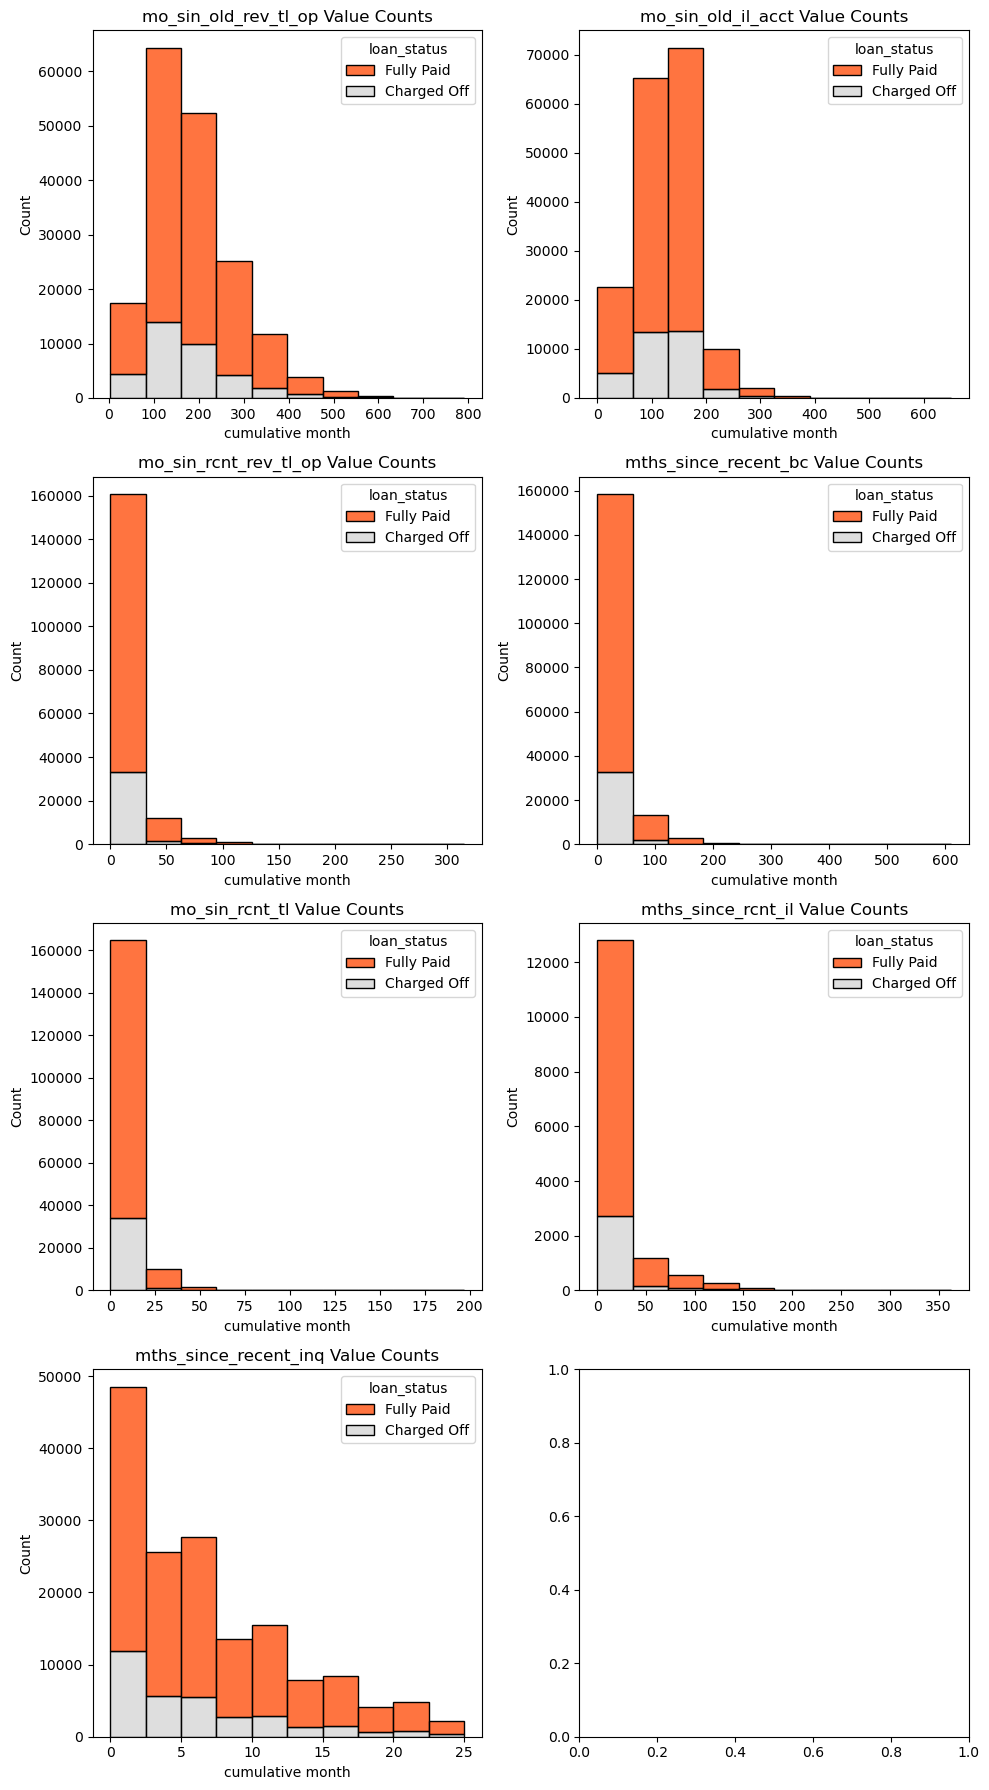

In [35]:

fig, ax = plt.subplots(round(len(mths)//2)+1, 2, figsize=(10, 6*(len(mths)//2)))

for idx, col in enumerate(mths):
    if idx % 2 == 0 : 
        sns.histplot(x=col, hue=target, data=EDA, bins=10, palette=['orangered', 'lightgray'], multiple='stack', ax=ax[idx//2, 0])
        ax[idx//2,0].set_title(f'{col} Value Counts')
        ax[idx//2,0].set_xlabel('cumulative month')
        ax[idx//2,0].set_ylabel('Count')


    else :
        sns.histplot(x=col, hue=target, data=EDA, bins=10, palette=['orangered', 'lightgray'], multiple='stack',ax=ax[idx//2, 1])
        ax[idx//2,1].set_title(f'{col} Value Counts')
        ax[idx//2,1].set_xlabel('cumulative month')
        ax[idx//2,1].set_ylabel('Count')


 
plt.tight_layout()
plt.show()

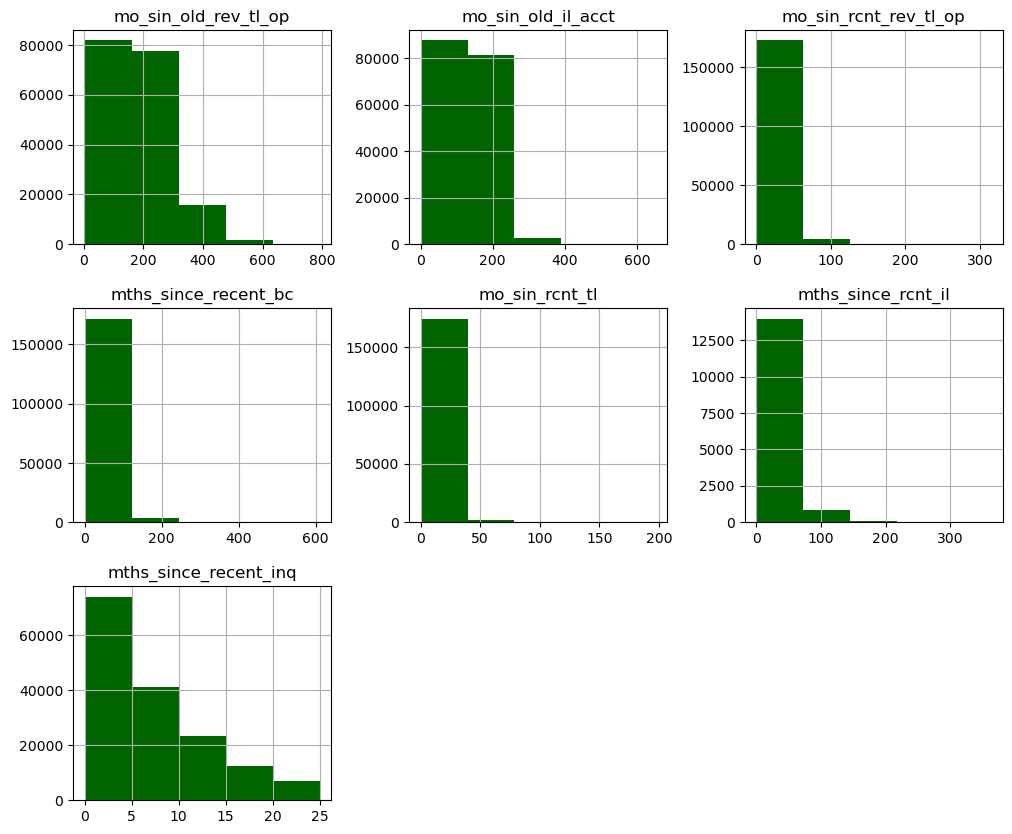

In [36]:
#가장 오래된 계좌 개설 누적개월과
#최근 계좌 개설 누적개월의 카운트 플롯

EDA[mths].hist(bins=5, figsize=(12,10), color='darkgreen');

<Axes: >

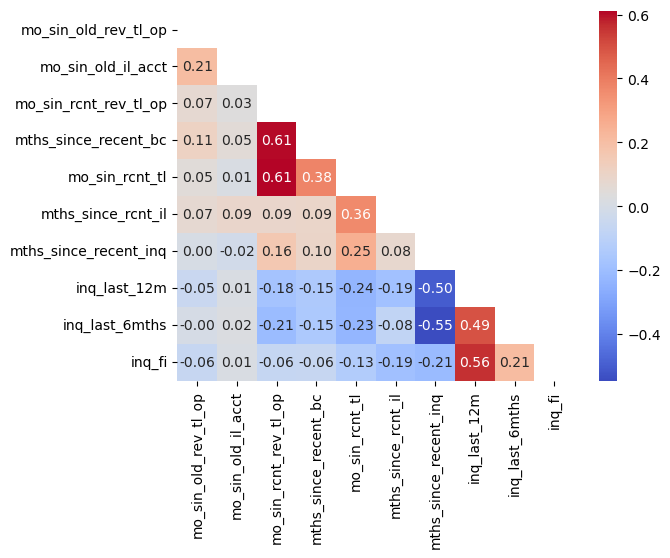

In [37]:
sns.heatmap(EDA[mths+inq_count].corr(),cmap='coolwarm', annot=True, fmt='.2f', mask = np.triu(EDA[mths+inq_count].corr()))

#상관계수 0.5이상의 변수 관계
1. inq_fi - inq_last_12m (inq_last_12m-inq_last_6mths 보다 크다. / 최근 6개월의 조회보다 총 재무조회수가 더 상관)
2. 

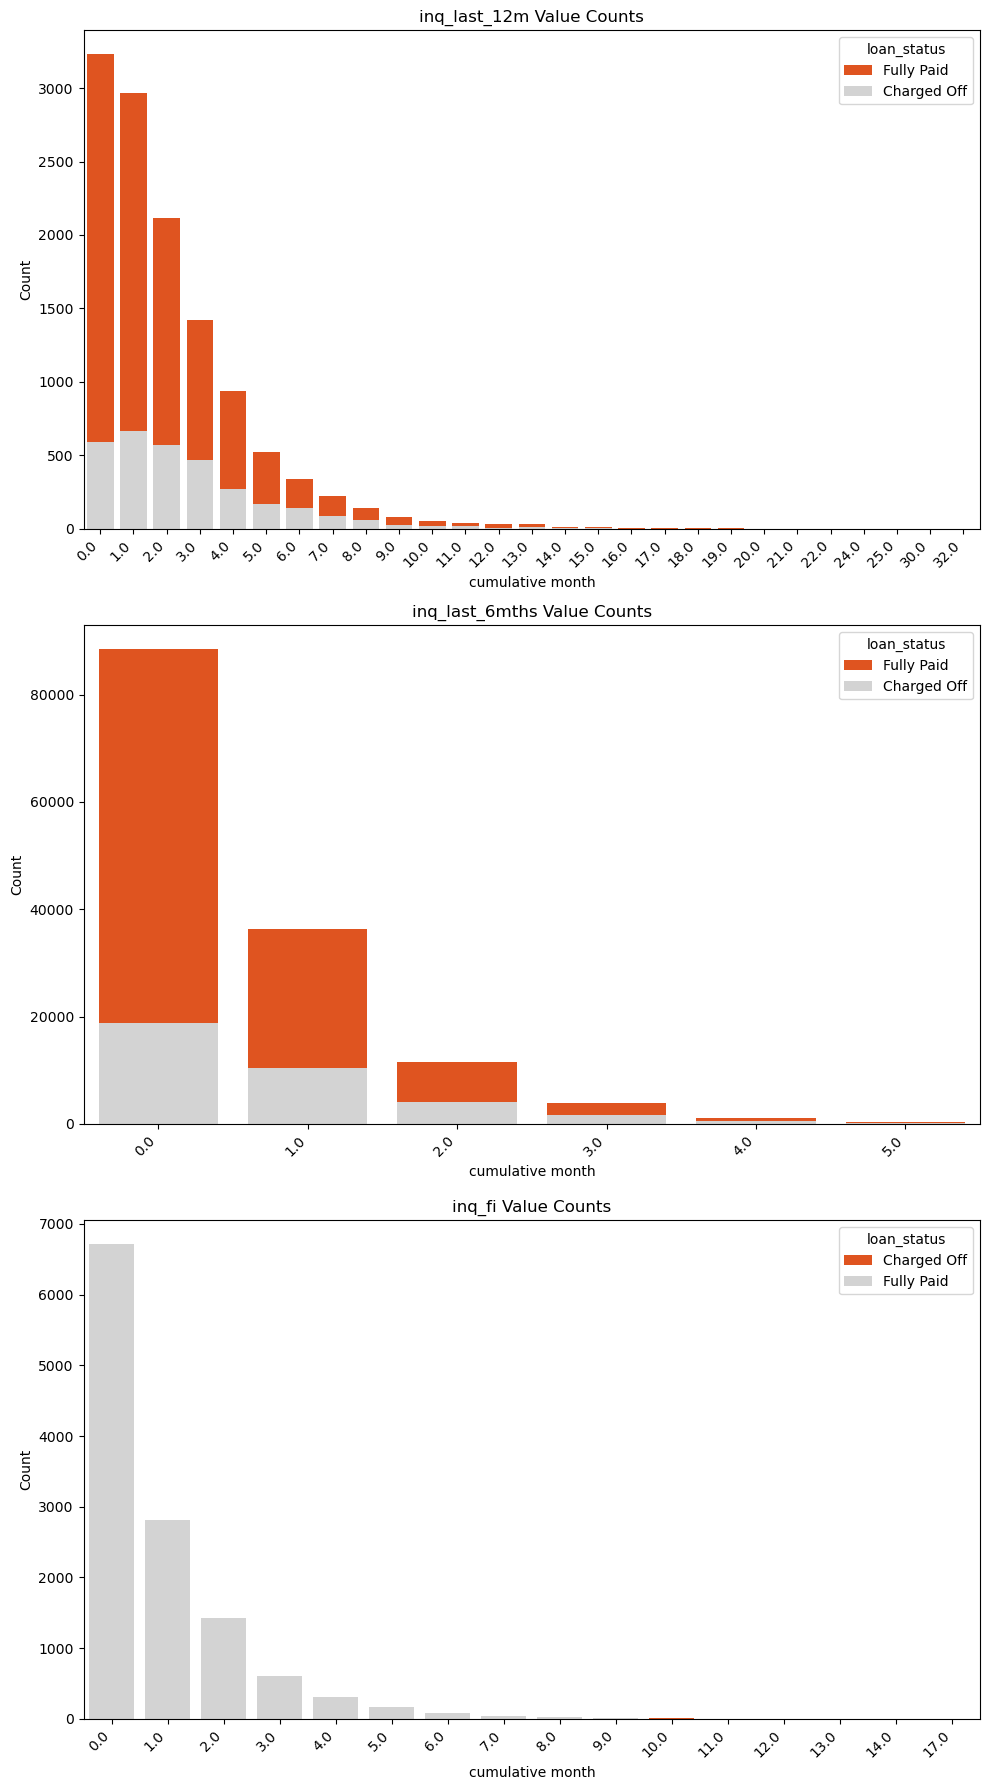

In [38]:

#최근 신용/재무 조회 횟수_타겟별로

fig, ax = plt.subplots(len(inq_count), 1, figsize=(10, 6*(len(inq_count))))

for idx, col in enumerate(inq_count):
    
        sns.countplot(x=col, hue=target, data=EDA, palette=['orangered', 'lightgray'], dodge=False, ax=ax[idx])
        ax[idx].set_title(f'{col} Value Counts')
        ax[idx].set_xlabel('cumulative month')
        ax[idx].set_ylabel('Count')
    
# 눈금 레이블 회전 설정
set_xticklabels(ax[:])

    
plt.tight_layout()
plt.show()

## 수치형 

In [39]:
### 1. credit_balance 신용 점수에 관한

In [40]:
EDA[credit_balance].info()

<class 'pandas.core.frame.DataFrame'>
Index: 176952 entries, 17156 to 137746
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   all_util                        15342 non-null   float64
 1   bc_open_to_buy                  175251 non-null  float64
 2   max_bal_bc                      15342 non-null   float64
 3   loan_amnt                       176952 non-null  float64
 4   funded_amnt                     176952 non-null  float64
 5   funded_amnt_inv                 176952 non-null  float64
 6   tot_hi_cred_lim                 176952 non-null  float64
 7   total_bc_limit                  176952 non-null  float64
 8   total_pymnt_inv                 176952 non-null  float64
 9   total_pymnt                     176952 non-null  float64
 10  total_rec_prncp                 176952 non-null  float64
 11  total_rec_int                   176952 non-null  float64
 12  last_pymnt_amnt  

In [41]:
print_uv(credit_balance,30)

all_util NU: 132
!!!TOO MANY!!!
 [nan 55. 48. 84.]
----------------------------------------------------------------------
bc_open_to_buy NU: 37190
!!!TOO MANY!!!
 [7905. 1851. 3555. 5167.]
----------------------------------------------------------------------
max_bal_bc NU: 8875
!!!TOO MANY!!!
 [  nan 3159. 2883. 5977.]
----------------------------------------------------------------------
loan_amnt NU: 1355
!!!TOO MANY!!!
 [30000. 12975.  8000. 25000.]
----------------------------------------------------------------------
funded_amnt NU: 1355
!!!TOO MANY!!!
 [30000. 12975.  8000. 25000.]
----------------------------------------------------------------------
funded_amnt_inv NU: 1363
!!!TOO MANY!!!
 [30000. 12975.  8000. 25000.]
----------------------------------------------------------------------
tot_hi_cred_lim NU: 126544
!!!TOO MANY!!!
 [ 68100. 331332. 344823.  38747.]
----------------------------------------------------------------------
total_bc_limit NU: 3649
!!!TOO MANY!!!
 [42

In [42]:
credit_balance.remove('out_prncp')
credit_balance.remove('out_prncp_inv')

In [43]:
print(credit_balance)

['all_util', 'bc_open_to_buy', 'max_bal_bc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'tot_hi_cred_lim', 'total_bc_limit', 'total_pymnt_inv', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount', 'total_bal_ex_mort', 'total_bal_il', 'revol_bal', 'revol_bal_joint']


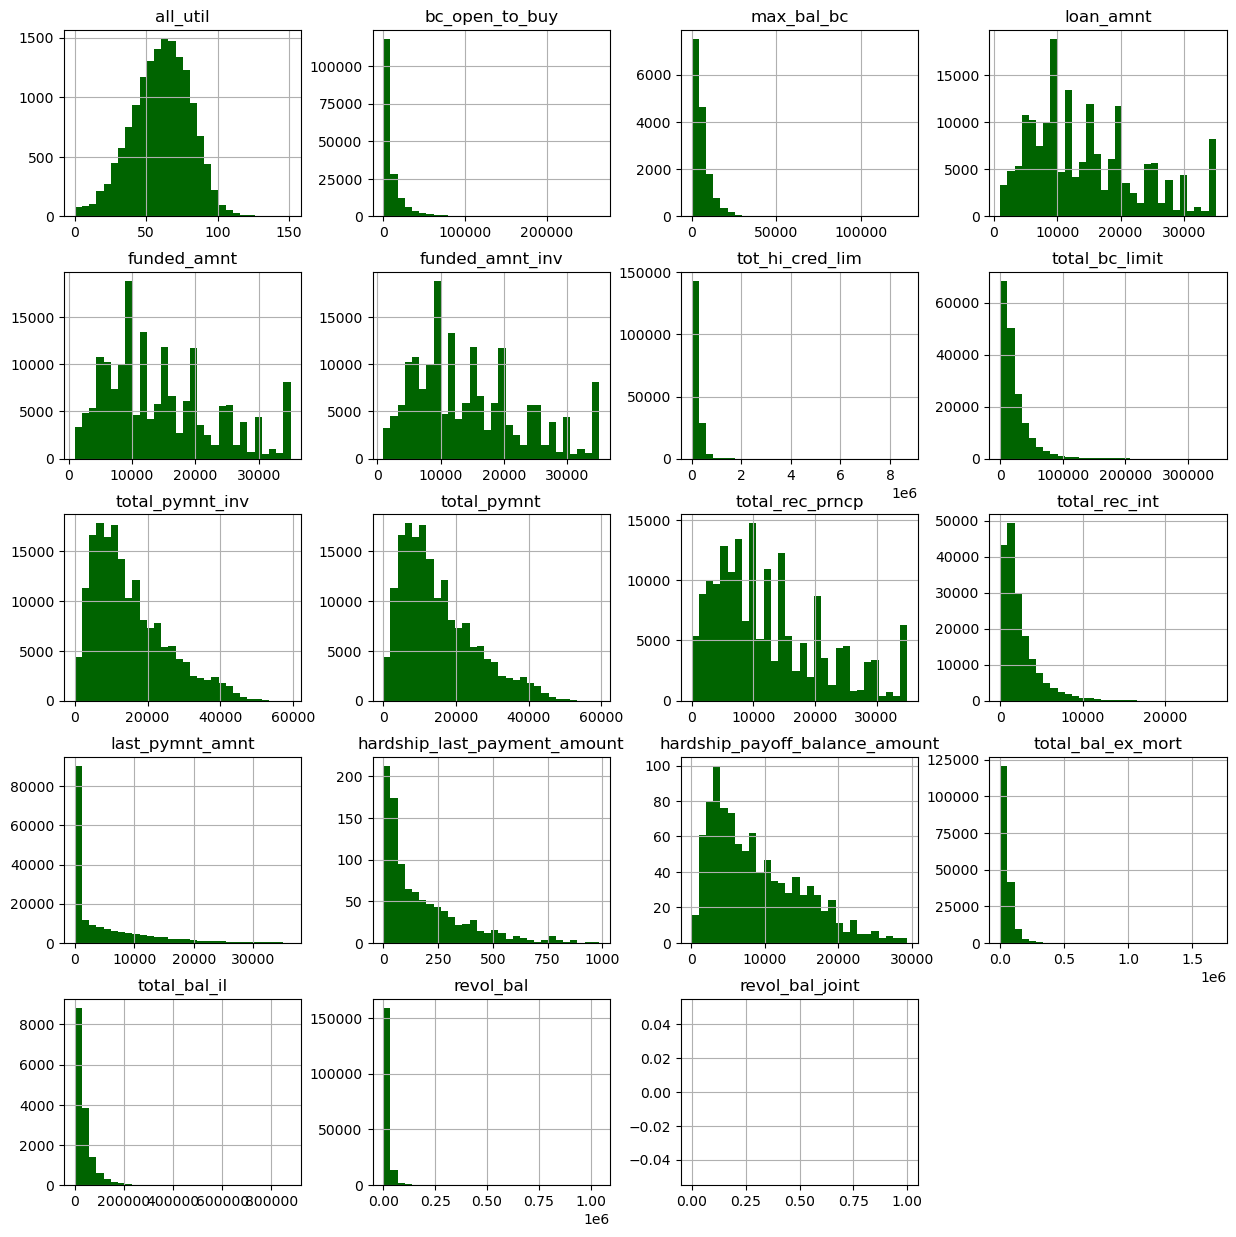

In [44]:
#가장 오래된 계좌 개설 누적개월과
#최근 계좌 개설 누적개월의 카운트 플롯

EDA[credit_balance].hist(bins=30, figsize=(15,15), color='darkgreen');

In [45]:
log_credit_balance = EDA[credit_balance].apply(lambda x: np.log1p(x))
log_credit_df = pd.concat((log_credit_balance, y_train),axis=1)

In [50]:
log_credit_df[credit_balance]

,all_util,bc_open_to_buy,max_bal_bc,loan_amnt,funded_amnt,funded_amnt_inv,tot_hi_cred_lim,total_bc_limit,total_pymnt_inv,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,hardship_last_payment_amount,hardship_payoff_balance_amount,total_bal_ex_mort,total_bal_il,revol_bal,revol_bal_joint
17156,4.204693,7.785305,9.110741,10.404293,10.404293,10.404293,11.551858,10.422311,10.550139,10.550139,10.404293,8.553093,6.967721,NaN,NaN,11.275429,10.695144,10.455071,NaN
199327,NaN,8.975377,NaN,10.308986,10.308986,10.308986,11.128747,10.652566,10.472460,10.472460,10.308986,8.580921,10.100219,NaN,NaN,10.717170,NaN,10.640604,NaN
37536,NaN,7.524021,NaN,9.470857,9.470857,9.470857,12.710879,9.947552,9.550511,9.550511,9.470857,6.981823,8.939854,NaN,NaN,10.914907,NaN,9.854822,NaN
184601,NaN,8.176392,NaN,8.987322,8.987322,8.987322,12.750789,8.853808,9.068975,9.068975,8.987322,6.524619,8.405743,NaN,NaN,10.724126,NaN,8.981933,NaN
111425,NaN,8.550241,NaN,10.126671,10.126671,10.126671,10.564834,9.525224,10.275377,10.275377,10.126671,8.296409,6.693633,NaN,NaN,9.971660,NaN,9.605082,NaN
61493,NaN,7.003974,NaN,8.325064,8.325064,8.325064,9.564302,7.696667,8.508756,8.508756,8.325064,6.725022,4.811208,NaN,NaN,9.097060,NaN,8.255309,NaN
163741,NaN,9.871945,NaN,9.503085,9.503085,9.503085,11.295565,9.998843,9.616347,9.616347,9.503085,7.382821,9.150685,NaN,NaN,8.506334,NaN,8.488999,NaN
183807,NaN,8.389587,NaN,8.630700,8.630700,8.630700,10.350382,8.389587,8.765916,8.765916,8.630700,6.699414,8.037091,NaN,NaN,8.426393,NaN,0.000000,NaN
11681,4.025352,8.642062,8.058327,9.573315,9.573315,9.573315,11.858414,9.268704,8.433359,8.433359,7.992914,7.401848,6.234999,NaN,NaN,11.626540,11.540005,9.136479,NaN
26888,NaN,8.645762,NaN,9.903538,9.903538,9.890959,12.729223,9.989711,9.964594,9.977172,9.903538,7.332598,9.661984,NaN,NaN,11.867343,NaN,9.717519,NaN


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
sns.countplot(data=EDA, x='application_type', ax=axes[0])
prop_df = pd.crosstab(EDA['application_type'], EDA[target], normalize='index')
prop_df.plot(kind='bar', stacked=True, ax=axes[1], color=['orangered','lightgray'])
plt.xticks(rotation=360)
plt.show()

In [ ]:
corr = EDA[loan + fee + score + risk_count + risk_mnts].drop(columns=['grade','sub_grade']).corr()
fig, ax1 = plt.subplots(figsize=(20,15))
sns.heatmap(corr,cmap='coolwarm', annot=True, fmt='.2f', mask = np.triu(corr), ax=ax1);

### 계좌, 카드, 비율(카드 한도사용율 등 비율), 자산(소득, 계좌잔액 등) EDA
[accts + cards + rate + property] 

In [ ]:
EDA[accts + cards + rate + property].info()

In [ ]:
corr = EDA[accts + cards + property].drop(columns=['verification_status','emp_length','addr_state', 'zip_code', 'addr_state','home_ownership']).corr()
fig, ax1 = plt.subplots(figsize=(20,15))
sns.heatmap(corr,cmap='coolwarm', annot=True, fmt='.2f', mask = np.triu(corr), ax=ax1);

In [ ]:
coor_df = pd.DataFrame(corr[(corr != 1)].unstack().sort_values(ascending=False, key=np.abs).drop_duplicates()[:-1], columns=["상관계수"])
coor_df.head(15)

In [ ]:
same = EDA[['num_sats','open_acc']][EDA['num_sats']== EDA['open_acc']].shape[0]
diff = EDA[['num_sats','open_acc']][EDA['num_sats']!= EDA['open_acc']].dropna().shape[0]

In [ ]:
print(f'same_len: {same}')
print(f'diff_len: {diff}')

In [ ]:
#활성계좌 중에서는 거의 만족스런 상환 계좌
#-> 특성 공하기 활성계좌 중 만족스런 상환 계좌 비율로 / 활성계좌중 만족스럽지 않는 상환게좌 수(전체-만족)

#활성 리볼빙 카드 중에서는 

### **타겟과의 관계**

In [ ]:
df = EDA[accts + cards + property].drop(columns=['home_ownership','emp_length','zip_code','addr_state','verification_status'])

In [ ]:
log_df = df.apply(lambda x: np.log1p(x))

In [ ]:
log_df = EDA[accts + cards + property+[target]]

In [ ]:
log_df.columns

In [ ]:
sns.set(palette="gnuplot2")
fig, ax = plt.subplots(round(len(credit_balance)//2)+1, 2, figsize=(10, 6*(len(credit_balance)//2)))

for idx, col in enumerate(credit_balance):
    if idx % 2 == 0 : 
        sns.boxplot(y=col, x=target, data=log_credit_df,ax=ax[idx//2, 0])
        ax[idx//2,0].set_title(f'{col} Value Counts')
        ax[idx//2,0].set_ylabel(col)


    else :
        sns.boxplot(y=col, x=target, data=log_credit_df,ax=ax[idx//2, 1])
        ax[idx//2,1].set_title(f'{col} Value Counts')
        ax[idx//2,0].set_ylabel(col)


plt.tight_layout()
plt.show()

#### 변수 선택 후보 리스트
1. 

### 등급과 근무연수에 관한 EDA
'emp_length', 'grade','sub_grade' 

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(17, 14))

ratio_order = EDA.groupby('emp_length')[target].value_counts().unstack()[['Charged Off']].sort_values(by='Charged Off', ascending=False).index
sns.countplot(data=EDA, x='emp_length', hue=target, order=ratio_order, ax=axes[0])

ax1 = axes[0].twinx()
sns.lineplot(x='emp_length', y='avg_cur_bal', data=EDA, ax=ax1, color='red', estimator='mean')
ax1.set_ylabel('Average avg_cur_bal', color='red')

ratio_order = EDA.groupby('emp_length')[target].value_counts().unstack()[['Charged Off']].sort_values(by='Charged Off', ascending=False).index
sns.countplot(data=EDA, x='emp_length', hue=target, order=ratio_order, ax=axes[1])

ax2 = axes[1].twinx()
charged_off_ratio = EDA.groupby('emp_length')[target].value_counts(normalize=True).unstack().loc[:, 'Charged Off']
sns.lineplot(x=charged_off_ratio.index, y=charged_off_ratio.values, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Charged Off Ratio', color='red')

plt.show()

## grade와 sub_grade 중 선택

In [ ]:
 EDA[['grade','sub_grade']].info()

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()
grade_order = np.sort(EDA['grade'].unique())
sns.countplot(data=EDA, x='grade', order=grade_order, ax=ax)
ax.set_ylabel('Count')

ax2 = ax.twinx()
charged_off_ratio = EDA.groupby('grade')[target].value_counts(normalize=True).unstack().loc[:, 'Charged Off']
sns.lineplot(x=charged_off_ratio.index, y=charged_off_ratio.values, ax=ax2, color='red', marker='o', label='Charged Off Ratio')
ax2.set_ylabel('Charged Off Ratio', color='red')

plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.subplots()
sub_grade_order = np.sort(EDA['sub_grade'].unique())
sns.countplot(data=EDA, x='sub_grade', order=sub_grade_order , ax=ax)
ax.set_ylabel('Count')

ax2 = ax.twinx()
charged_off_ratio = EDA.groupby('sub_grade')[target].value_counts(normalize=True).unstack().loc[:, 'Charged Off']
sns.lineplot(x=charged_off_ratio.index, y=charged_off_ratio.values, ax=ax2, color='red', marker='o', label='Charged Off Ratio')
ax2.set_ylabel('Charged Off Ratio', color='red')


plt.show()